#Practice 1: Request to address (Kaggle for tweet and bitcoin)

In [ ]:
!pip install kaggle

###kaggle datasets download -d [DATASET] -> bitcoin-tweets -> https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets

In [ ]:
!kaggle datasets download -d bitcoin-tweets

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def scrap(url):
  r = requests.get(url)
  t = r.text
  pyjs = json.loads(t)
  return pyjs

In [ ]:
url = 'https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets'
response = requests.get(url)
results = json.loads(response.text)

##Count Number of Tweets for each Date and Density

In [ ]:
df_tweet = pd.read_csv("date_tweet_2.csv")
df_tweet = df_tweet.groupby(df_tweet.columns.tolist(),as_index=False).size()
df_tweet.to_csv('df_tweet.csv')
print('Density: ', df_tweet['size'].max())

df_tweet

Density:  53501


,tweet_date,size
0,2/10/2021,3526
1,2/13/2021,2285
2,2/14/2021,4009
3,2/15/2021,4651
4,2/18/2021,2254
...,...,...
72,8/9/2021,53501
73,"['ETH', 'BTC', 'Bitcoin']",1
74,"['YieldFarming', 'Airdrop', 'Binance', 'Bitcoi...",1
75,['btc'],2


#Practice 2: Find Relationship Between Two Nodes (Tweet Bitcoin)

##Get Bit Coin Date

In [ ]:
import pandas as pd

df_bitcoin = pd.read_csv("coin_Bitcoin.csv")
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date']).dt.date
df_bitcoin.to_csv('df_bitcoin.csv')
df_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599999,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588700,32770.680780,33549.600180,33897.048590,3.872897e+10,6.350000e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259900,33402.696540,33854.421360,34668.548400,2.438396e+10,6.500000e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567150,34396.477460,34665.564870,35287.779770,2.492431e+10,6.620000e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661030,35284.344430,33746.002460,2.672155e+10,6.330000e+11


In [ ]:
df_bitcoin_date = pd.read_csv("df_bitcoin_date.csv")
df_bitcoin_date

,Unnamed: 0,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,0,1,Bitcoin,BTC,4/29/2013,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,1,2,Bitcoin,BTC,4/30/2013,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2,3,Bitcoin,BTC,5/1/2013,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,3,4,Bitcoin,BTC,5/2/2013,125.599999,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,4,5,Bitcoin,BTC,5/3/2013,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...,...
2986,2986,2987,Bitcoin,BTC,7/2/2021,33939.588700,32770.680780,33549.600180,33897.048590,3.872897e+10,6.350000e+11
2987,2987,2988,Bitcoin,BTC,7/3/2021,34909.259900,33402.696540,33854.421360,34668.548400,2.438396e+10,6.500000e+11
2988,2988,2989,Bitcoin,BTC,7/4/2021,35937.567150,34396.477460,34665.564870,35287.779770,2.492431e+10,6.620000e+11
2989,2989,2990,Bitcoin,BTC,7/5/2021,35284.344430,33213.661030,35284.344430,33746.002460,2.672155e+10,6.330000e+11


##Merge

In [ ]:
import numpy as np
new_bitcoin = []
for index, row in df_bitcoin_date.iterrows():
  for index2, row2 in df_tweet.iterrows():
    if row['Date']==row2['tweet_date']:
      new_bitcoin.append((row['Name'], row['Date'],row2['tweet_date'], row2['size'], row['Open'], row['Close']))
      print(row['Name'], row['Date'],row2['tweet_date'], row2['size'], row['Open'], row['Close'])

numpy_array = np.array(new_bitcoin)
df_merge = pd.DataFrame(numpy_array, columns = ["Name", "Bitcoin_Date", "tweet_date", "tweet_count", "Open", "Close"])
df_merge.to_csv('df_merge.csv')


df_merge


Bitcoin 2/5/2021 2/5/2021 1694 36931.54565 38144.306860000004
Bitcoin 2/6/2021 2/6/2021 3278 38138.38834 39266.01073
Bitcoin 2/7/2021 2/7/2021 3030 39250.19051 38903.44148
Bitcoin 2/8/2021 2/8/2021 5647 38886.82729 46196.46372
Bitcoin 2/9/2021 2/9/2021 4350 46184.99147 46481.10424
Bitcoin 2/10/2021 2/10/2021 3526 46469.7612 44918.18449
Bitcoin 2/13/2021 2/13/2021 2285 47491.202560000005 47105.51747
Bitcoin 2/14/2021 2/14/2021 4009 47114.509589999994 48717.29021
Bitcoin 2/15/2021 2/15/2021 4651 48696.536660000005 47945.05683
Bitcoin 2/18/2021 2/18/2021 2254 52140.97272 51679.796689999996
Bitcoin 2/19/2021 2/19/2021 4521 51675.981289999996 55888.13367999999
Bitcoin 2/22/2021 2/22/2021 3564 57532.738860000005 54207.319070000005
Bitcoin 2/28/2021 2/28/2021 1634 46194.01635 45137.770469999996
Bitcoin 3/11/2021 3/11/2021 217 55963.180089999994 57805.12302000001
Bitcoin 3/12/2021 3/12/2021 3923 57821.21875 57332.08896
Bitcoin 4/5/2021 4/5/2021 2197 58760.87326 59057.878970000005
Bitcoin 4/6/2

,Name,Bitcoin_Date,tweet_date,tweet_count,Open,Close
0,Bitcoin,2/5/2021,2/5/2021,1694,36931.54565,38144.306860000004
1,Bitcoin,2/6/2021,2/6/2021,3278,38138.38834,39266.01073
2,Bitcoin,2/7/2021,2/7/2021,3030,39250.19051,38903.44148
3,Bitcoin,2/8/2021,2/8/2021,5647,38886.82729,46196.46372
4,Bitcoin,2/9/2021,2/9/2021,4350,46184.99147,46481.10424
5,Bitcoin,2/10/2021,2/10/2021,3526,46469.7612,44918.18449
6,Bitcoin,2/13/2021,2/13/2021,2285,47491.202560000005,47105.51747
7,Bitcoin,2/14/2021,2/14/2021,4009,47114.509589999994,48717.29021
8,Bitcoin,2/15/2021,2/15/2021,4651,48696.536660000005,47945.05683
9,Bitcoin,2/18/2021,2/18/2021,2254,52140.97272,51679.796689999996


##Practice 3: Plot Graph

##Graph Nodes Edges

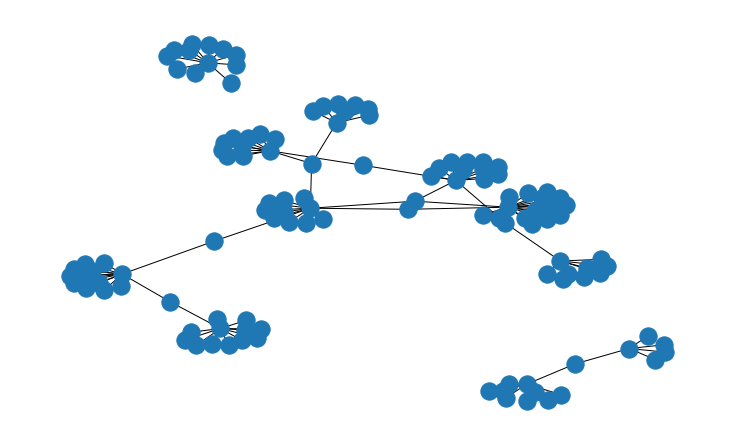

In [ ]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd

tweet_Bitcoin_name_date = pd.read_csv("date_tweet_user.csv")
G = nx.Graph()

for index, row in tweet_Bitcoin_name_date.iterrows():
  G.add_edge(row['user_name'], row['date'])
plt.figure(figsize=(10,6))
nx.draw(G)
plt.savefig("Graph.pdf", format="pdf")
plt.show()

#Practice 4: igraph

###date_tweet_user.csv

In [ ]:
import numpy as np
P = np.zeros((11,11))

In [ ]:
P[0][2]=1
P[0][9]=1
P[1][5]=1
P[1][8]=1
P[1][9]=1
P[2][9]=1
P[3][1]=1
P[3][4]=1
P[4][2]=1
P[5][10]=1
P[6][7]=1
P[6][8]=1
P[7][0]=1
P[7][7]=1
P[8][2]=1
P[8][8]=1
P[8][10]=1
P[9][6]=1
P[9][2]=1
P[10][8]=1
P[10][10]=1

In [ ]:
P

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]])

In [ ]:
!pip install igraph

In [ ]:
!pip install --upgrade python-igraph

#IGraph

In [ ]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd
df_merge = pd.read_csv("df_merge.csv")
df_user_tweet = pd.read_csv("df_user_tweet.csv")
tweet_Bitcoin_name_date = pd.read_csv("tweet_Bitcoin_name_date.csv")
nodes = []
date_ = tweet_Bitcoin_name_date['date']
for col1 in date_.unique(): #Bitcoin_Date
  nodes.append(col1)
#print(len(nodes))

user_ = tweet_Bitcoin_name_date['user_name']
for col2 in user_.unique(): #user_name
  nodes.append(col2)

print('Nodes: ',len(nodes))

print('Edges: ',len(tweet_Bitcoin_name_date))
#nodes

Nodes:  199751
Edges:  1048575


In [ ]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd

tweet_Bitcoin_name_date = pd.read_csv("tweet_Bitcoin_name_date.csv")
df1 = pd.DataFrame(tweet_Bitcoin_name_date.iloc[1309:1315, :])
df1

df2 = pd.DataFrame(tweet_Bitcoin_name_date.iloc[4230:4235, :])
df2

df3 = pd.DataFrame(tweet_Bitcoin_name_date.iloc[65842:65848, :])
df3

df4 = pd.DataFrame(tweet_Bitcoin_name_date.iloc[117056:117061, :])
df4


df5 = pd.DataFrame(tweet_Bitcoin_name_date.iloc[80470:80477, :])
df5

result = pd.concat([df1, df2, df3, df4, df5], axis=0)
print(len(result))
result


29


,date,user_name
1309,2/10/2021,BittrexPrices
1310,2/10/2021,TheEricMatthews
1311,2/10/2021,STUDIO192.NL
1312,2/10/2021,igor
1313,2/10/2021,The Crypto Cheerleader 💎
1314,2/10/2021,Samir Azizi
4230,2/9/2021,Pychic readings by Andre
4231,2/9/2021,Kur Kaç Oldu?
4232,2/9/2021,Kur Ne Oldu
4233,2/9/2021,Coinstats


In [ ]:
nodes_G = []
date_ = result['date']
for col1 in date_.unique(): #Bitcoin_Date
  nodes_G.append(col1)
#print(len(nodes))

user_ = result['user_name']
for col2 in user_.unique(): #user_name
  nodes_G.append(col2)

len_nodes =len(nodes_G)
GP = np.zeros(( len_nodes,len_nodes))
df = pd.DataFrame(result.iloc[:28])

for  index3, row3 in  df.iterrows():
  i=nodes_G.index(row3['date'])
  #print(i)
  j=nodes_G.index(row3['user_name'])
  #print(j)
  GP[i][j] = 1

In [ ]:
GP

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Practice 6: Scatter Plot

In [ ]:
!pip install --upgrade python-igraph

     |████████████████████████████████| 3.2 MB 5.3 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.8-py3-none-any.whl size=9070 sha256=2500351c6d9012955daac443950c617a21a4e2e80a0893419a364d917e143960
  Stored in directory: /root/.cache/pip/wheels/15/86/ef/b8bcdfbcb1c489771ad256c7cd1eb4971cdb7f3f670938b798
Successfully built python-igraph


<Figure size 20000x20000 with 0 Axes>

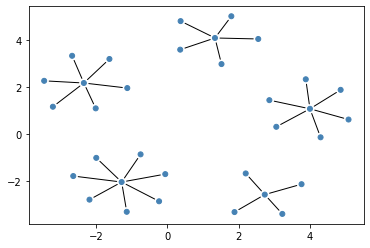

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import igraph
g = igraph.Graph.Adjacency(GP, mode='undirected', weighted=True)
fig  = figure(figsize=(2, 2), dpi=10000)
fig, ax = plt.subplots()
igraph.plot(g, target=ax)

<Figure size 20000x20000 with 0 Axes>

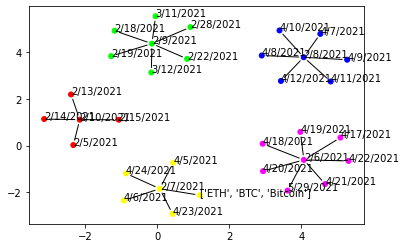

In [ ]:
from igraph import *
from matplotlib import pyplot as plot

i = g.community_infomap()
pal = igraph.drawing.colors.ClusterColoringPalette(len(i))
g.vs['color'] = pal.get_many(i.membership)
g.vs['name'] = nodes
fig  = figure(figsize=(2, 2), dpi=10000)
fig, ax = plt.subplots()
igraph.plot(g, target=ax, vertex_color = g.vs['color'], vertex_label =g.vs['name'])

#Community

In [ ]:
import community
import networkx.algorithms.community as nx_comm
import community.community_louvain as community_louvain
import networkx as nx
community =g.community_multilevel()
print('community.membership: ',community.membership)
print('community.modularity: ', community.modularity)
print('community.size_histogram(): ',community.size_histogram())
print('community.summary(): ',community.summary())

community.membership:  [0, 1, 2, 3, 4, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4]
community.modularity:  0.7933673469387755
community.size_histogram():  N = 5, mean +- sd: 6.6000 +- 1.1402
[5, 6): * (1)
[6, 7): * (1)
[7, 8): ** (2)
[8, 9): * (1)
community.summary():  Clustering with 33 elements and 5 clusters


#Centrality

In [ ]:
estimate = g.betweenness(vertices=None, directed=True, cutoff=2)
print( 'Betweenness computation complete.'  )

outcsv = csv.writer(open('centrality.csv', 'wb'))

for v in graph.vs():
   outcsv.writerow([v, estimate[vs]])

<Figure size 20000x20000 with 0 Axes>

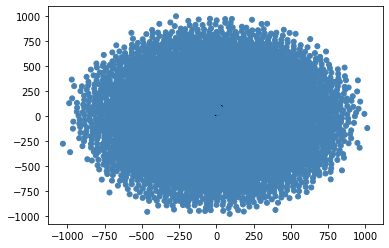

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import igraph
g = igraph.Graph.Adjacency(GP)
fig  = figure(figsize=(2, 2), dpi=10000)
fig, ax = plt.subplots()
igraph.plot(g, target=ax)

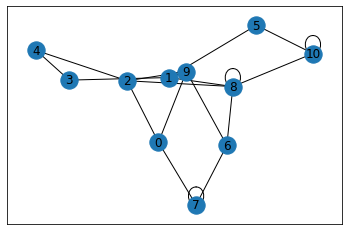

In [ ]:
G = nx.Graph(P)
nx.draw_networkx(G)

In [ ]:
Result= nx.degree_centrality(G)

In [ ]:
print(Result)

{0: 0.30000000000000004, 1: 0.4, 2: 0.4, 3: 0.2, 4: 0.2, 5: 0.2, 6: 0.30000000000000004, 7: 0.4, 8: 0.6000000000000001, 9: 0.4, 10: 0.4}


In [ ]:
g = igraph.Graph.Adjacency(P)

#Practice 5: Number of Nodes and Edges

In [ ]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import pandas as pd

df_merge = pd.read_csv("df_merge.csv")
df_user_tweet = pd.read_csv("df_user_tweet.csv")
tweet_Bitcoin_name_date = pd.read_csv("tweet_Bitcoin_name_date.csv")
G = nx.Graph()

for index, row in df_merge.iterrows():
  # To add a node, date
  G.add_node(row['Bitcoin_Date'])

for index2, row2 in df_user_tweet.iterrows():
  # To add a node, tweet
  G.add_node(row2['user_name'])

for index3, row3 in tweet_Bitcoin_name_date.iterrows():
  G.add_edge(row3['date'], row3['user_name'])

print(G)

Graph with 199763 nodes and 494872 edges


#Practice 8:community_detection

###Algorithm Girwan Newman

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

###1- Communities Detection by networkx - girvan_newman

In [ ]:
!pip install arabic-reshaper

In [ ]:
!pip install python-bidi

In [ ]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

communities = girvan_newman(G)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(len(node_groups))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('green')
    elif node in node_groups[2]:
      color_map.append('red')
    elif node in node_groups[3]:
      color_map.append('yellow')


reshaped_text_a = reshape(u'Whale')
a = get_display(reshaped_text_a)

reshaped_text_b = reshape(u'Crypto Squawk')
b = get_display(reshaped_text_b)

reshaped_text_c = reshape(u'Brett Murphy')
c = get_display(reshaped_text_c)

reshaped_text_d = reshape(u'Crypto Cartel')
d = get_display(reshaped_text_d)

reshaped_text_e = reshape(u'Smokyho')
e = get_display(reshaped_text_e)

reshaped_text_f = reshape(u'WA State')
f = get_display(reshaped_text_f)

reshaped_text_g = reshape(u'Susan Hillary')
g = get_display(reshaped_text_g)

reshaped_text_h = reshape(u'Kush Jain')
h = get_display(reshaped_text_h)

reshaped_text_i = reshape(u'Bitcoin Mate')
i = get_display(reshaped_text_i)

reshaped_text_j = reshape(u'Bitcoin Price')
j = get_display(reshaped_text_j)

reshaped_text_k = reshape(u'Web Analysis')
k = get_display(reshaped_text_k)


mapping =   {0: a,   1:b , 2:c, 3:d, 4:e, 5:f, 6:g, 7:h, 8:i, 9:j, 10:k }

pos = nx.spring_layout(G, k=1.5, iterations=100)
#G = nx.relabel_nodes(G, mapping, copy=False)
nx.draw(G,pos, node_color=color_map,node_size=500, with_labels=True)
plt.savefig("Graph.png", format="PNG")
plt.show()

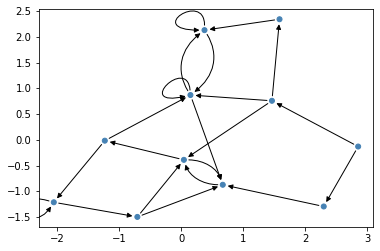

In [ ]:
import igraph
import matplotlib.pyplot as plt
# load data into a graph
g = igraph.Graph.Read_Ncol('network.txt')

# plot graph
#fig  = figure(figsize=(2, 2), dpi=10000)

fig, ax = plt.subplots()
igraph.plot(g, target=ax)

In [ ]:
# identify communities
communities = igraph.community_edge_betweenness()

# not really sure what to do next
num_communities = communities.optimal_count
communities.as_clustering(num_communities)

###Modularity

In [ ]:
import community
import networkx.algorithms.community as nx_comm
import community.community_louvain as community_louvain
import networkx as nx
community =g.community_multilevel()

###IGraph Communities Detection

In [ ]:
# identify communities
communities = igraph.community_edge_betweenness()

# not really sure what to do next
num_communities = communities.optimal_count
communities.as_clustering(num_communities)

###Compare - By dendrogram

In [ ]:
# calculate dendrogram
dendrogram = igraph.community_edge_betweenness()
# convert it into a flat clustering
clusters = dendrogram.as_clustering()
# get the membership vector
membership = clusters.membership